Abalone dataset

**Goal:** to predict **age range estimation** of abalone using clustering method

# Data Preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA

In [6]:
df_abalone = pd.read_csv('abalone_dataset.csv', header=None)
df_abalone.columns = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight','shell weight','rings']
df_abalone

sex  length  diameter  height  whole weight  shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      viscera weight  shell weight  rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [278]:
df_abalone['sex'].value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [279]:
df_abalone['rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: rings, dtype: int64

In [280]:
df_abalone.describe(include='all')

sex       length     diameter       height  whole weight  \
count   4177  4177.000000  4177.000000  4177.000000   4177.000000   
unique     3          NaN          NaN          NaN           NaN   
top        M          NaN          NaN          NaN           NaN   
freq    1528          NaN          NaN          NaN           NaN   
mean     NaN     0.523992     0.407881     0.139516      0.828742   
std      NaN     0.120093     0.099240     0.041827      0.490389   
min      NaN     0.075000     0.055000     0.000000      0.002000   
25%      NaN     0.450000     0.350000     0.115000      0.441500   
50%      NaN     0.545000     0.425000     0.140000      0.799500   
75%      NaN     0.615000     0.480000     0.165000      1.153000   
max      NaN     0.815000     0.650000     1.130000      2.825500   

        shucked weight  viscera weight  shell weight        rings  
count      4177.000000     4177.000000   4177.000000  4177.000000  
unique             NaN             NaN           NaN          NaN  
top                NaN             NaN           NaN          NaN  
freq               NaN             NaN           NaN          NaN  
mean          0.359367        0.180594      0.238831     9.933684  
std           0.221963        0.109614      0.139203     3.224169  
min           0.001000        0.000500      0.001500     1.000000  
25%           0.186000        0.093500      0.130000     8.000000  
50%           0.336000        0.171000      0.234000     9.000000  
75%           0.502000        0.253000      0.329000    11.000000  
max           1.488000        0.760000      1.005000    29.000000

In [7]:
# categorize the range of rings, consider it as an 'age group'

conditions = [
    (df_abalone['rings'] <= 10),
    (df_abalone['rings'] <= 20),
    (df_abalone['rings'] > 20)]
choices = [0, 1,2]
df_abalone['age group'] = np.select(conditions,choices)

In [282]:
# distribution of age group 
df_abalone['age group'].value_counts()

0    2730
1    1411
2      36
Name: age group, dtype: int64

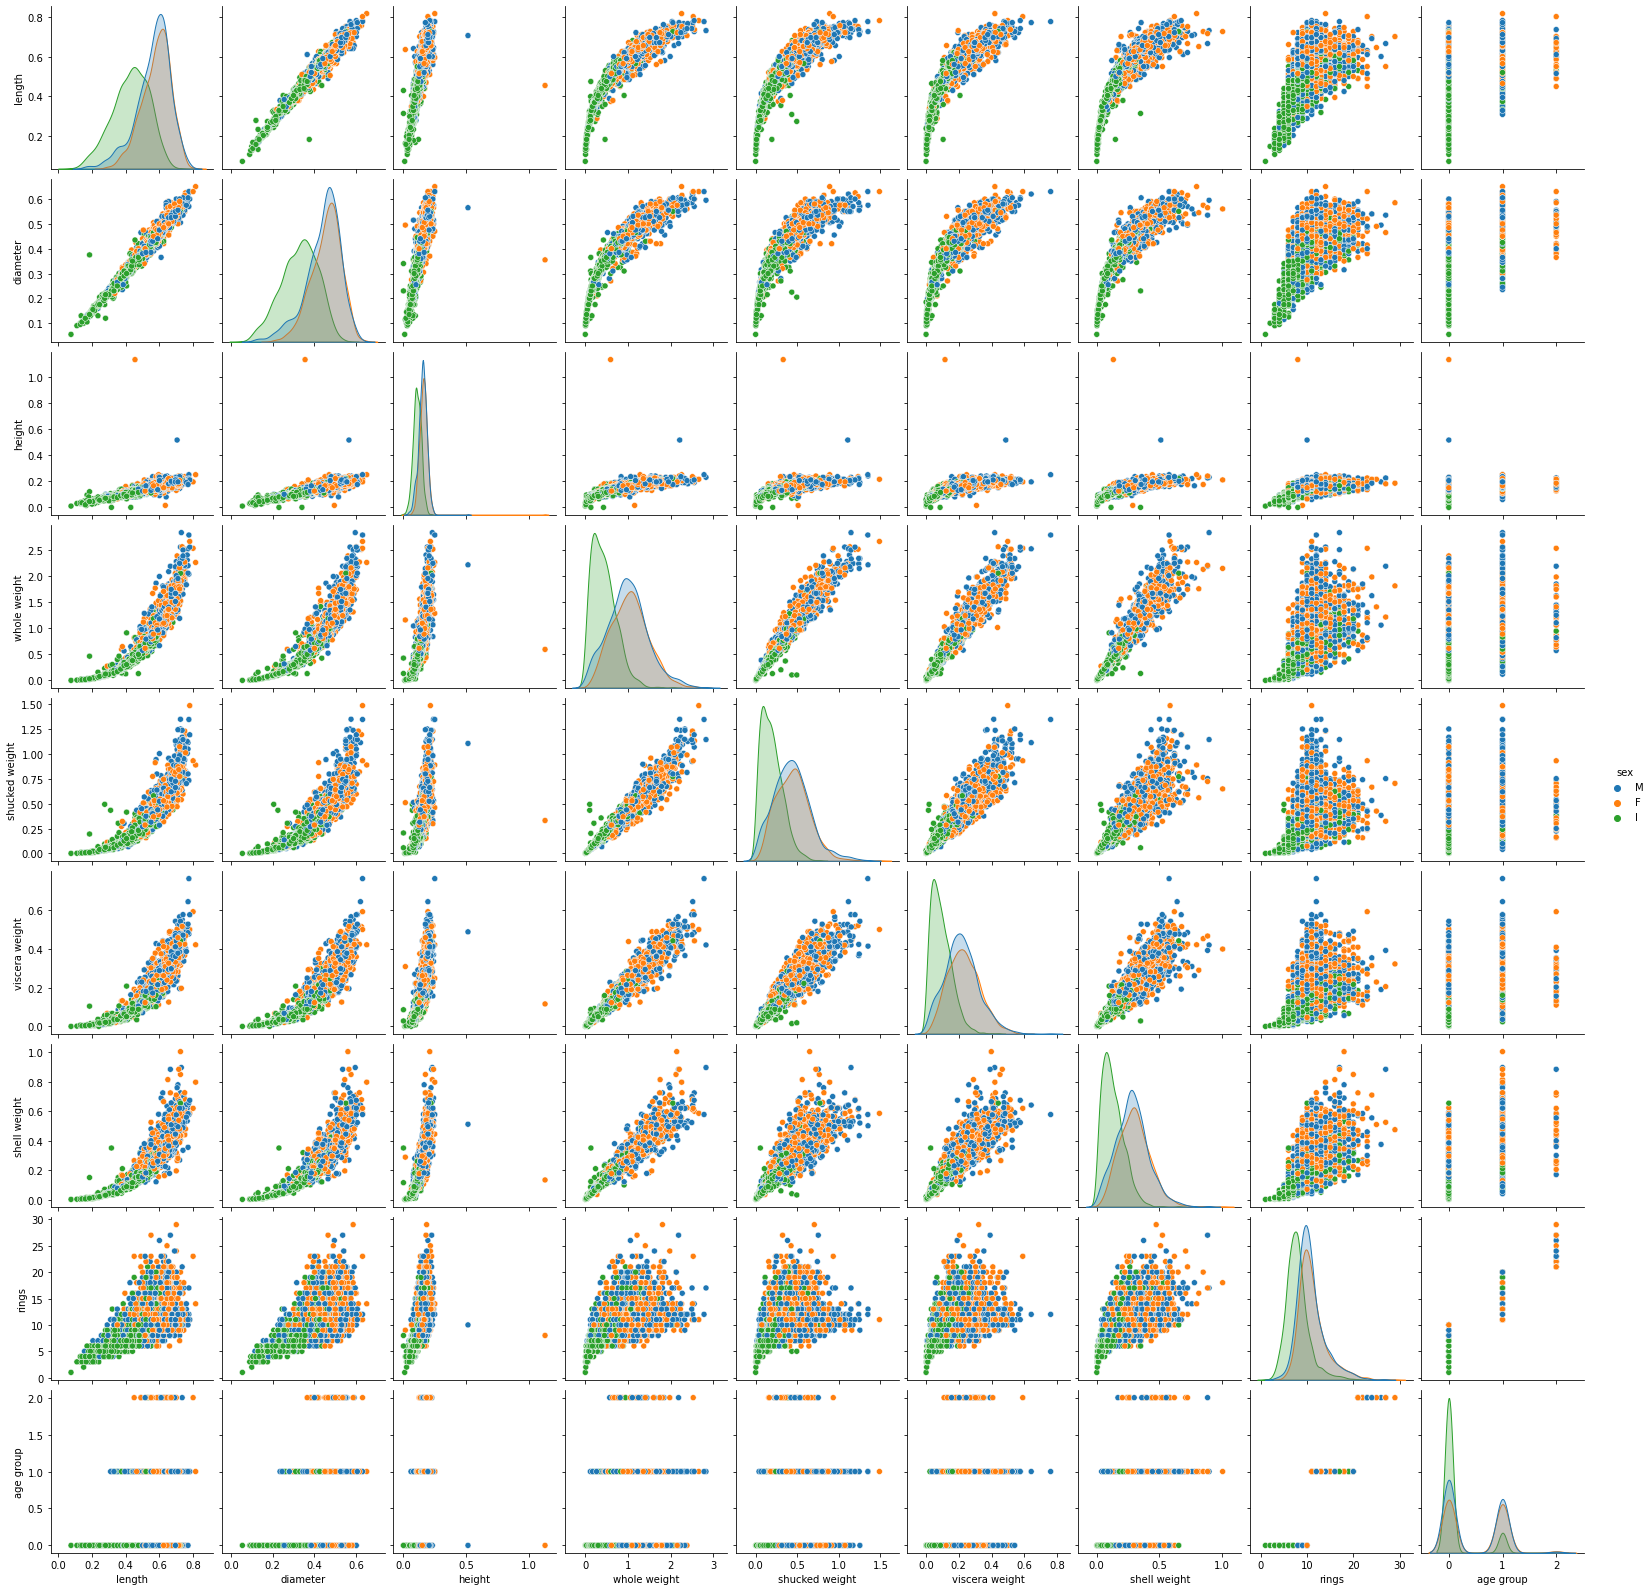

In [283]:
# pairplot grouped by 'sex'
sns.pairplot(df_abalone, hue='sex')

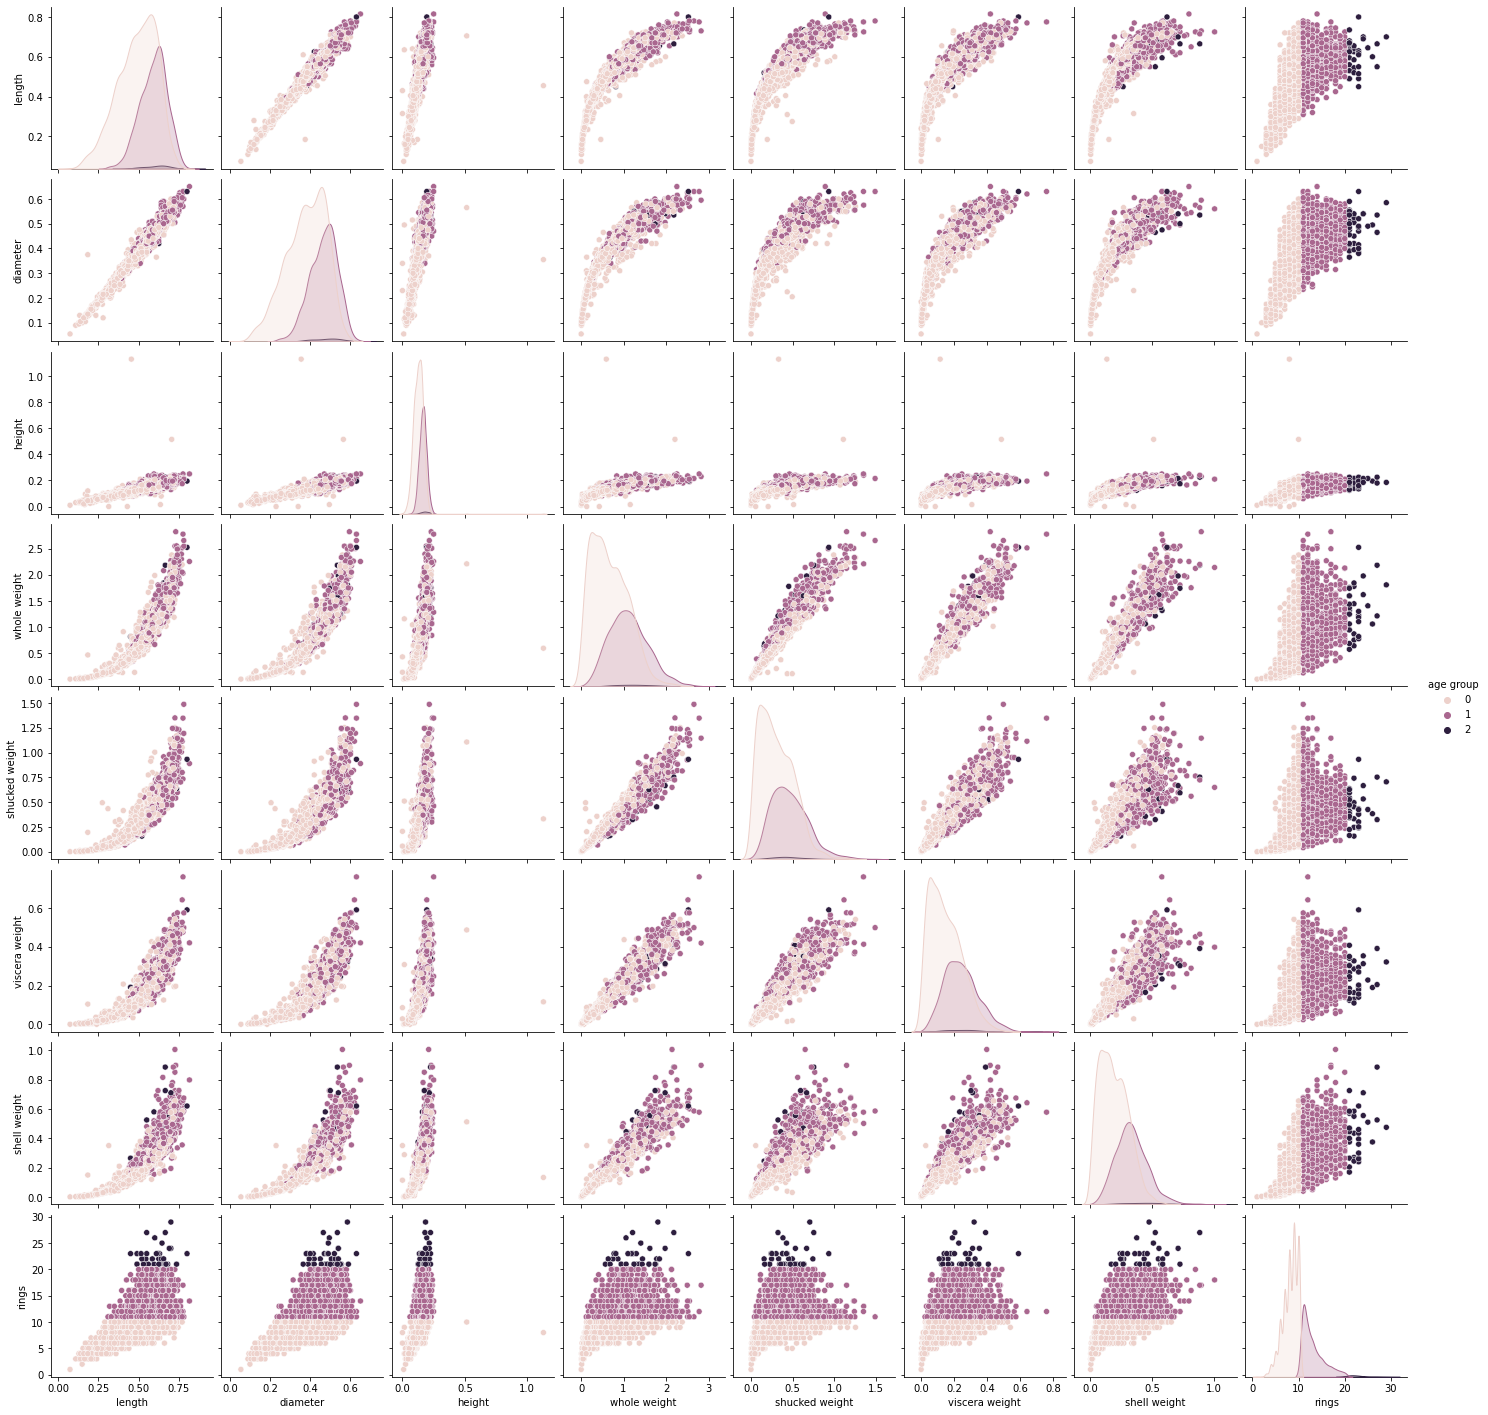

In [284]:
# pairplot grouped by 'age group'
sns.pairplot(df_abalone, hue='age group')

important insight from EDA above:

* **sex doesn't affect** the range of **ring** number
* the **longer, taller, heavier** the abalone, it would have **more rings**

from EDA based on age group above, I decided to use **length and height** for **no PCA scenario** to predict the **age** of abalone, as both length & height are the **most common and the easiest** measurement.

as for **PCA scenario**, I use **all columns**, **except** sex, rings, age group

*Sex isn't used because from EDA, it can be seen that sex doesn't affect the range number of rings. both female & male have similar range in their rings numbers. 
Rings and Age Group are associated with each other and actually can be assumed as the target column, hence put it aside.

# Data Preprocessing

In [8]:
# to keep the original dataframe, copy it to a new variable
df_ab = df_abalone.copy()

reference of dimensionality reduction: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

In [9]:
# reduce dimensionality with PCA (using 7 columns: length, diameter, height, all 4 weight columns)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_component = pca.fit_transform(df_ab.iloc[:,1:8])

# Plot the explained variances
range_pca = range(pca.n_components_)
pca_variance = pca.explained_variance_ratio_
pca_result = pd.DataFrame({'PCA Feature': range_pca,'Variance (%)': pca_variance})
pca_result

PCA Feature  Variance (%)
0            0      0.974101
1            1      0.011418

In [287]:
# viewing the importance of each feature/attribute in PCA components
pca.components_

array([[ 0.19315606,  0.15955208,  0.05928271,  0.84261922,  0.37195895,
         0.18225102,  0.22834926],
       [-0.35006929, -0.31882074, -0.13475175, -0.01882402,  0.70343169,
        -0.01294771, -0.51216078]])

from **first PCA component**, the top 3 *high importance features* are **whole weight** (84%), **shucked weight** (37%), and **shell weight** (22%)

from **second PCA component**, the top *high importance feature* is **shucked weight** (70%)

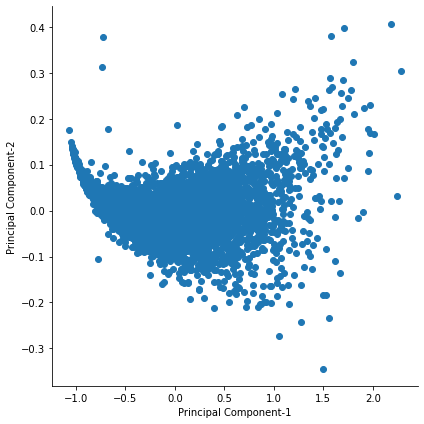

In [11]:
# create dataframe consist of principal component
df_pca = pd.DataFrame(data = pca_component, columns = ['Principal Component-1', 'Principal Component-2'])

# Data Visualization after PCA
sns.FacetGrid(df_pca, height= 6).map(plt.scatter, df_pca.columns[0], df_pca.columns[1])
plt.show()

In [289]:
# dataframe of transformed data from PCA
df_pca.head()

Principal Component-1  Principal Component-2
0              -0.372971               0.001403
1              -0.726930               0.029870
2              -0.177005              -0.059590
3              -0.372241              -0.006486
4              -0.759040               0.042558

In [12]:
# changing dataframe df_pca to np.array format
X_pca = np.array(df_pca)
X_pca

array([[-0.37297053,  0.00140299],
       [-0.72693017,  0.02987049],
       [-0.17700541, -0.05958994],
       ...,
       [ 0.41895149,  0.01668526],
       [ 0.34791783,  0.02404874],
       [ 1.31843776,  0.13799284]])

# K-Means

## Choosing the best K

In [13]:
# import kmeans
from sklearn.cluster import KMeans

In [14]:
# install library kneed untuk mencari jumlah n cluster dengan nilai terbaik
!pip install kneed

# import library
from kneed import KneeLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
# Mengambil nilai SSE dari masing-masing jumlah cluster
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

Posisi Cluster ideal: 3


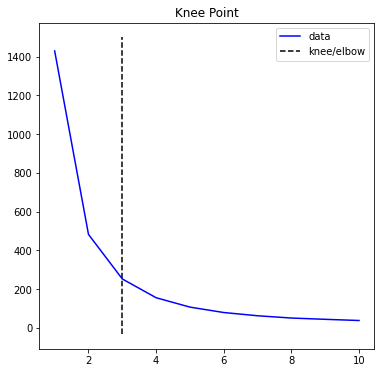

In [16]:
# Mencari elbow/knee (jumlah cluster paling optimal)
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print("Posisi Cluster ideal: {}".format(kl.knee))
kl.plot_knee()

hence, we will use **3 clusters**

***assume*** that it would cluster the age of abalone into **3 age groups (0-10, 11-20, 21-30)**

in this dataset, the range of rings is between 1 to 29 --> range of age is between 2.5 to 30.5

## Clustering with K-Means (with PCA)
reference: https://www.kdnuggets.com/2020/06/centroid-initialization-k-means-clustering.html

In [17]:
n_cluster = 3

In [18]:
n_cluster = 3
kmean1_pca = KMeans(n_clusters= n_cluster, init='k-means++', random_state=42)
kmean2_pca = KMeans(n_clusters=n_cluster, init='random', random_state=42)

# fitting model
kmean1_pca.fit(X_pca)
kmean2_pca.fit(X_pca)

# ambil koordinat centroid
centers_plus_pca = kmean1_pca.cluster_centers_
print("Koordinat Centroid dengan K-Means++ initialization {}".format(centers_plus_pca),'\n')

centers_rand_pca = kmean2_pca.cluster_centers_
print("Koordinat Centroid dengan Random initialization {}".format(centers_rand_pca),'\n')

Koordinat Centroid dengan K-Means++ initialization [[ 0.11806577 -0.01943946]
 [-0.58035637  0.01067396]
 [ 0.8440131   0.01895258]] 

Koordinat Centroid dengan Random initialization [[ 0.85604491  0.01982651]
 [-0.57276303  0.01027932]
 [ 0.13113344 -0.01947506]] 



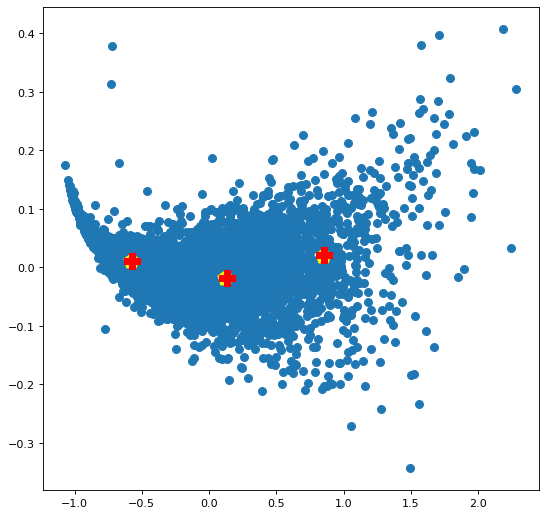

In [19]:
def centroid_plots(X, centroid_kmeansplus, centroid_random):
    fig=plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
    
    plt.scatter(X[:, 0], X[:, 1],
                s=50,
                marker='o',
                label='cluster 1')

    plt.scatter(centroid_kmeansplus[:, 0], 
                centroid_kmeansplus[:, 1],
                s=200, c='yellow',
                marker='p')

    plt.scatter(centroid_random[:, 0],
                centroid_random[:, 1],
                s=200, c='red',
                marker='P')

centroid_plots(X_pca, centers_plus_pca, centers_rand_pca)

In [20]:
# mengambil label hasil klaster
result_kmeans1_pca = df_pca.copy()
result_kmeans1_pca['Cluster'] = kmean1_pca.labels_
print("Result K-Means Clustering using K-Means++ initialization\n",result_kmeans1_pca.head(),'\n')

result_kmeans2_pca = df_pca.copy()
result_kmeans2_pca['Cluster'] = kmean2_pca.labels_
print("Result K-Means Clustering using Random initialization\n",result_kmeans2_pca.head(),'\n')

Result K-Means Clustering using K-Means++ initialization
    Principal Component-1  Principal Component-2  Cluster
0              -0.372971               0.001403        1
1              -0.726930               0.029870        1
2              -0.177005              -0.059590        0
3              -0.372241              -0.006486        1
4              -0.759040               0.042558        1 

Result K-Means Clustering using Random initialization
    Principal Component-1  Principal Component-2  Cluster
0              -0.372971               0.001403        1
1              -0.726930               0.029870        1
2              -0.177005              -0.059590        2
3              -0.372241              -0.006486        1
4              -0.759040               0.042558        1 



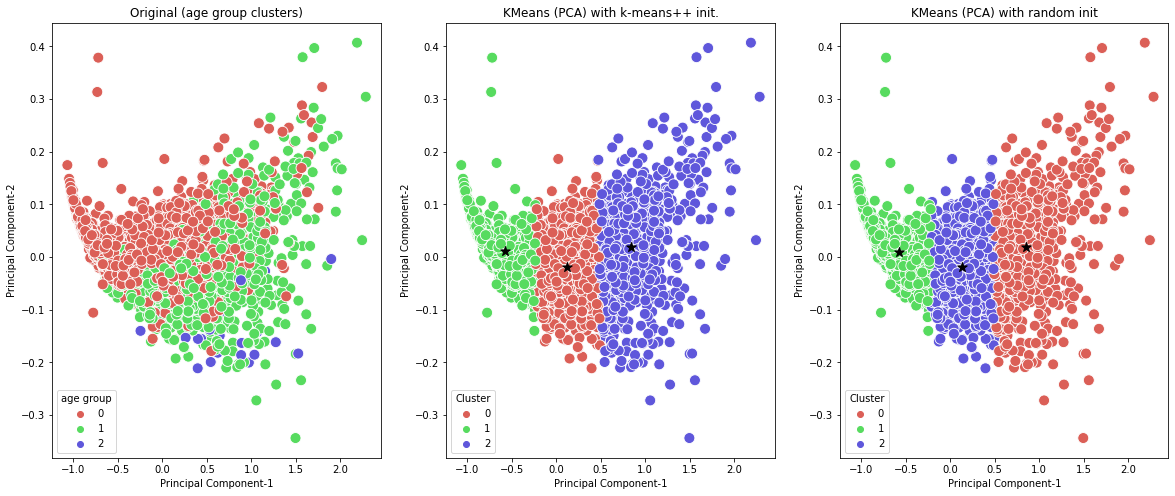

In [21]:
# plot clustering result

fig, axes = plt.subplots(1,3, figsize=(20, 8))


# plotting original age group clustering

df_pca_agegroup = df_pca.copy()
df_pca_agegroup['age group'] = df_ab['age group']
sns.scatterplot(
    ax=axes[0],
    x=df_pca_agegroup.iloc[:,0], y=df_pca_agegroup.iloc[:,1],
    s=120,
    hue=df_pca_agegroup.iloc[:,2],
    palette= sns.color_palette('hls', len(df_pca_agegroup.iloc[:,2].unique())))
axes[0].set_title('Original (age group clusters)')


# plotting clustering result of K-means 1 (using k-means++ init)

sns.scatterplot(
    ax=axes[1],
    x=result_kmeans1_pca.iloc[:,0], y=result_kmeans1_pca.iloc[:,1],
    s = 120,
    hue= result_kmeans1_pca.Cluster, 
    # palette= ['g', 'r', 'b', 'y'])
    palette= sns.color_palette('hls', len(result_kmeans1_pca.Cluster.unique())))

# plot the centroids
axes[1].scatter(centers_plus_pca[:, 0], centers_plus_pca[:, 1], marker = "*", s = 100, color = 'black')
# define plot title
axes[1].set_title('KMeans (PCA) with k-means++ init.')


# plotting clustering result of K-means 2 (using random init)

sns.scatterplot(
    ax=axes[2],
    x=result_kmeans2_pca.iloc[:,0], y=result_kmeans2_pca.iloc[:,1],
    s = 120,
    hue= result_kmeans2_pca.Cluster, 
    # palette= ['g', 'r', 'b', 'y'])
    palette= sns.color_palette('hls', len(result_kmeans2_pca.Cluster.unique())))

# plot the centroids
axes[2].scatter(centers_rand_pca[:, 0], centers_rand_pca[:, 1], marker = "*", s = 100, color = 'black')
# define plot title
axes[2].set_title('KMeans (PCA) with random init')

plt.show()

## Clustering with K-Means (no PCA)

In [22]:
df_nopca = df_ab.copy()
df_nopca = df_nopca.loc[:,['length','height']]

In [23]:
df_nopca.head(3)

length  height
0   0.455   0.095
1   0.350   0.090
2   0.530   0.135

In [24]:
X_nopca = np.array(df_nopca)
X_nopca

array([[0.455, 0.095],
       [0.35 , 0.09 ],
       [0.53 , 0.135],
       ...,
       [0.6  , 0.205],
       [0.625, 0.15 ],
       [0.71 , 0.195]])

In [25]:
n_cluster = 3

In [26]:
n_cluster = 3
kmean1_nopca = KMeans(n_clusters= n_cluster, init='k-means++', random_state=42)
kmean2_nopca = KMeans(n_clusters=n_cluster, init='random', random_state=42)

# fitting model
kmean1_nopca.fit(X_nopca)
kmean2_nopca.fit(X_nopca)

# ambil koordinat centroid
centers_plus_nopca = kmean1_nopca.cluster_centers_
print("Koordinat Centroid dengan K-Means++ initialization {}".format(centers_plus_nopca),'\n')

centers_rand_nopca = kmean2_nopca.cluster_centers_
print("Koordinat Centroid dengan Random initialization {}".format(centers_rand_nopca),'\n')

Koordinat Centroid dengan K-Means++ initialization [[0.62811117 0.17082029]
 [0.32742282 0.08214094]
 [0.49455035 0.12985117]] 

Koordinat Centroid dengan Random initialization [[0.32742282 0.08214094]
 [0.49455035 0.12985117]
 [0.62811117 0.17082029]] 



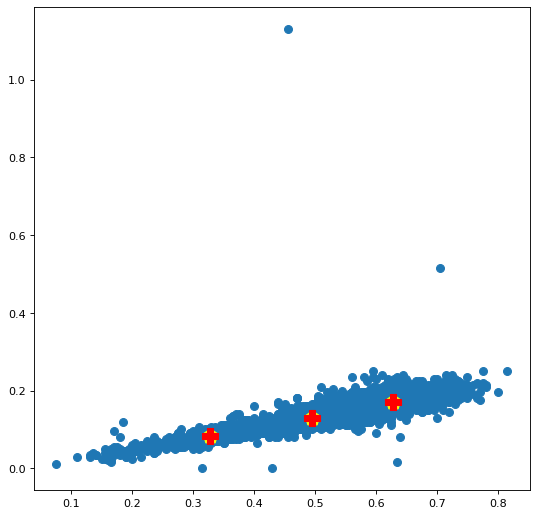

In [27]:
centroid_plots(X_nopca, centers_plus_nopca, centers_rand_nopca)

In [28]:
# mengambil label hasil klaster
result_kmeans1_nopca = df_nopca.copy()
result_kmeans1_nopca['Cluster'] = kmean1_nopca.labels_
print("Result K-Means Clustering using K-Means++ initialization\n",result_kmeans1_nopca.head(),'\n')

result_kmeans2_nopca = df_nopca.copy()
result_kmeans2_nopca['Cluster'] = kmean2_nopca.labels_
print("Result K-Means Clustering using Random initialization\n",result_kmeans2_nopca.head(),'\n')

Result K-Means Clustering using K-Means++ initialization
    length  height  Cluster
0   0.455   0.095        2
1   0.350   0.090        1
2   0.530   0.135        2
3   0.440   0.125        2
4   0.330   0.080        1 

Result K-Means Clustering using Random initialization
    length  height  Cluster
0   0.455   0.095        1
1   0.350   0.090        0
2   0.530   0.135        1
3   0.440   0.125        1
4   0.330   0.080        0 



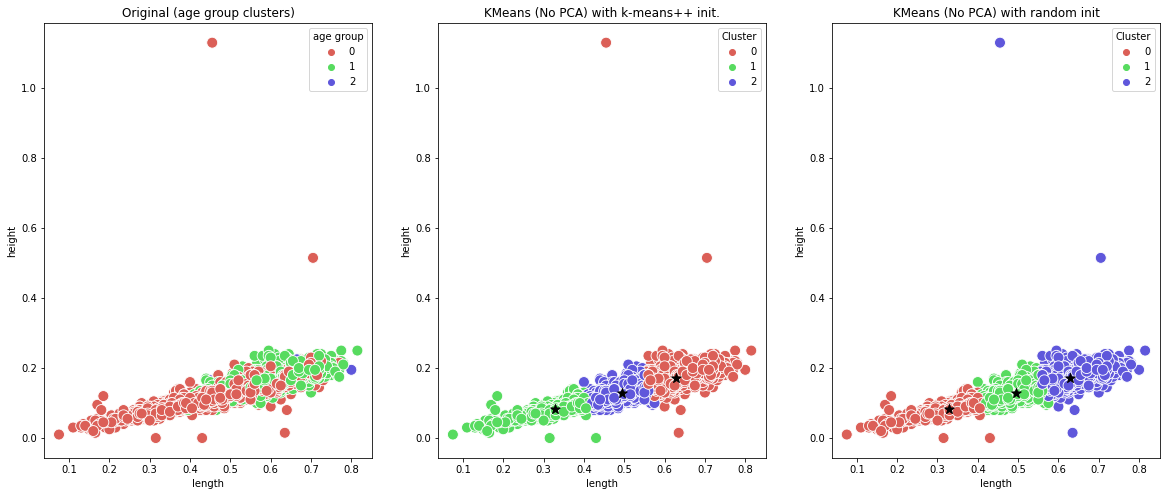

In [29]:
# plot clustering result

fig, axes = plt.subplots(1,3, figsize=(20, 8))

# plotting original age group clustering

sns.scatterplot(
    ax=axes[0],
    x=df_abalone['length'], y=df_abalone['height'],
    s=120,
    hue=df_abalone['age group'],
    palette= sns.color_palette('hls', len(df_abalone['age group'].unique())))
axes[0].set_title('Original (age group clusters)')

# plotting clustering result of K-means 1 (using k-means++ init)

sns.scatterplot(
    ax=axes[1],
    x=result_kmeans1_nopca.iloc[:,0], y=result_kmeans1_nopca.iloc[:,1],
    s = 120,
    hue= result_kmeans1_nopca.Cluster, 
    # palette= ['g', 'r', 'b', 'y'])
    palette= sns.color_palette('hls', len(result_kmeans1_nopca.Cluster.unique())))

# plot the centroids
axes[1].scatter(centers_plus_nopca[:, 0], centers_plus_nopca[:, 1], marker = "*", s = 100, color = 'black')
# define plot title
axes[1].set_title('KMeans (No PCA) with k-means++ init.')


# plotting clustering result of K-means 2 (using random init)

sns.scatterplot(
    ax=axes[2],
    x=result_kmeans2_nopca.iloc[:,0], y=result_kmeans2_nopca.iloc[:,1],
    s = 120,
    hue= result_kmeans2_nopca.Cluster, 
    # palette= ['g', 'r', 'b', 'y'])
    palette= sns.color_palette('hls', len(result_kmeans2_nopca.Cluster.unique())))

# plot the centroids
axes[2].scatter(centers_rand_nopca[:, 0], centers_rand_nopca[:, 1], marker = "*", s = 100, color = 'black')
# define plot title
axes[2].set_title('KMeans (No PCA) with random init')

plt.show()

# Hierarchical Clustering

## Hierarchical Clustering (with PCA)

In [31]:
# import library for agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

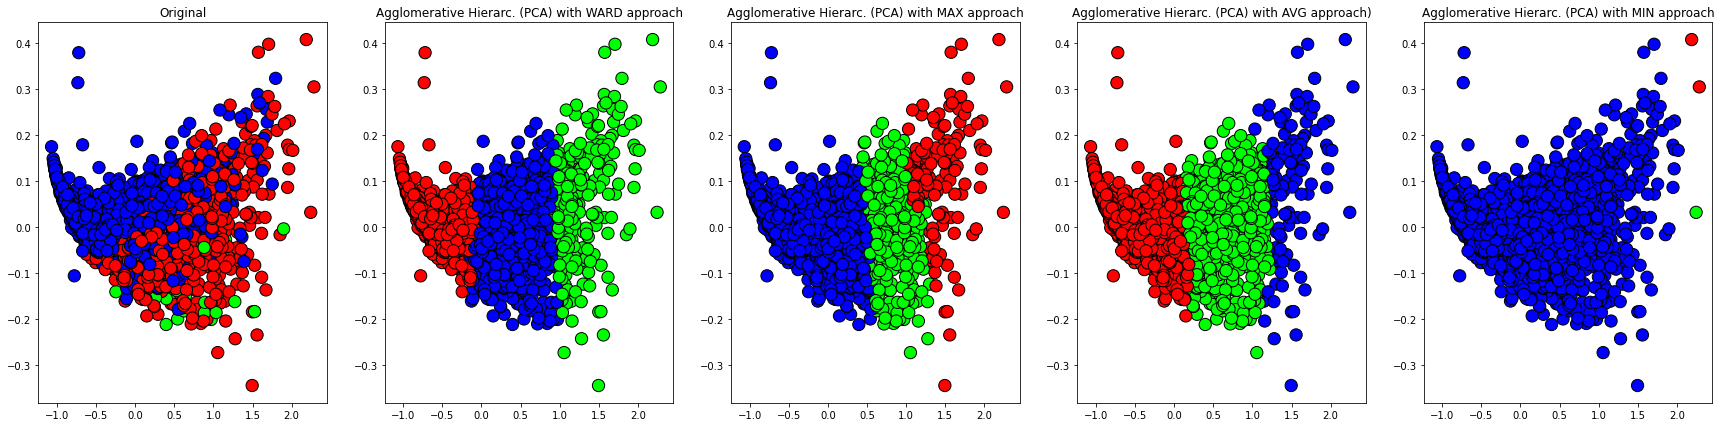

In [32]:
# agglomerative Ward
ward_pca = AgglomerativeClustering(n_clusters=3, linkage="ward")
ward_pca.fit(X_pca)

# agglomerative complete (MAX)
max_pca = AgglomerativeClustering(n_clusters=3, linkage="complete")
max_pca.fit(X_pca)

# agglomerative average
avg_pca = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pca.fit(X_pca)

# agglomerative single (MIN)
min_pca = AgglomerativeClustering(n_clusters=3, linkage="single")
min_pca.fit(X_pca)

result_ward_pca = df_pca.copy()
result_ward_pca['Cluster'] = ward_pca.labels_

result_max_pca = df_pca.copy()
result_max_pca['Cluster'] = max_pca.labels_

result_avg_pca = df_pca.copy()
result_avg_pca['Cluster'] = avg_pca.labels_

result_min_pca = df_pca.copy()
result_min_pca['Cluster'] = min_pca.labels_

ward_pca_label = ward_pca.labels_
max_pca_label = max_pca.labels_
avg_pca_label = avg_pca.labels_
min_pca_label = min_pca.labels_

#visualisasi perbandingan kelas origin dengan hasil klaster
fig, axes = plt.subplots(1, 5, figsize=(30,7))
axes[0].scatter(df_pca_agegroup.iloc[:,0], df_pca_agegroup.iloc[:,1], c=df_pca_agegroup.iloc[:,2], cmap='brg', edgecolor='k', s=150)
axes[1].scatter(result_ward_pca.iloc[:,0], result_ward_pca.iloc[:,1], c=result_ward_pca['Cluster'], cmap='brg', edgecolor='k', s=150)
axes[2].scatter(result_max_pca.iloc[:,0], result_max_pca.iloc[:,1], c=result_max_pca['Cluster'], cmap='brg', edgecolor='k', s=150)
axes[3].scatter(result_avg_pca.iloc[:,0], result_avg_pca.iloc[:,1], c=result_avg_pca['Cluster'], cmap='brg', edgecolor='k', s=150)
axes[4].scatter(result_min_pca.iloc[:,0], result_min_pca.iloc[:,1], c=result_min_pca['Cluster'], cmap='brg', edgecolor='k', s=150)

axes[0].set_title('Original')
axes[1].set_title('Agglomerative Hierarc. (PCA) with WARD approach')
axes[2].set_title('Agglomerative Hierarc. (PCA) with MAX approach')
axes[3].set_title('Agglomerative Hierarc. (PCA) with AVG approach)')
axes[4].set_title('Agglomerative Hierarc. (PCA) with MIN approach')
plt.show()

di bawah ini adalah salah satu **contoh dendrogram** yang terbentuk dari *Hierarchical Clustering* dengan metode *Ward* pada **data dengan PCA**

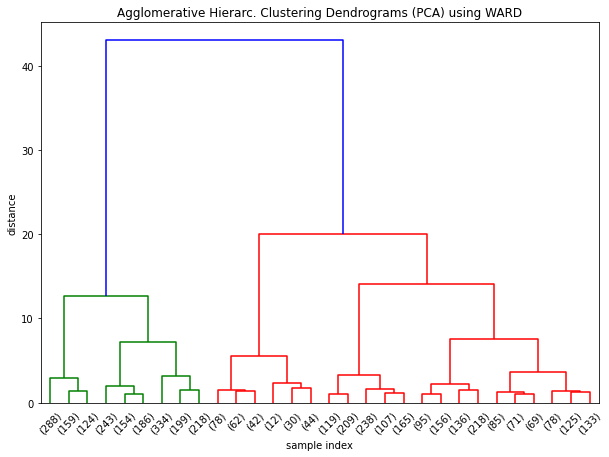

In [33]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 7))
plt.title("Agglomerative Hierarc. Clustering Dendrograms (PCA) using WARD")
plt.xlabel('sample index')
plt.ylabel('distance')
dend2 = sch.dendrogram(sch.linkage(X_pca, method='ward'), truncate_mode='lastp')

## Hierarchical Clustering (no PCA)

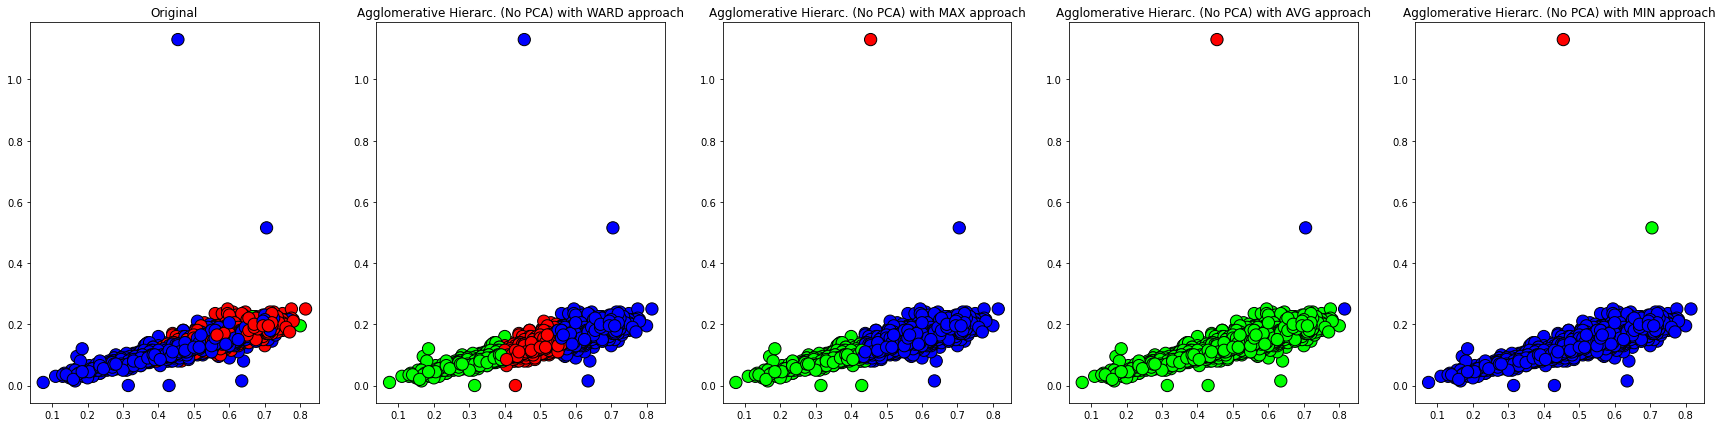

In [34]:
# agglomerative Ward
ward_nopca = AgglomerativeClustering(n_clusters=3, linkage="ward")
ward_nopca.fit(X_nopca)

# agglomerative complete (MAX)
max_nopca = AgglomerativeClustering(n_clusters=3, linkage="complete")
max_nopca.fit(X_nopca)

# agglomerative average
avg_nopca = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_nopca.fit(X_nopca)

# agglomerative single (MIN)
min_nopca = AgglomerativeClustering(n_clusters=3, linkage="single")
min_nopca.fit(X_nopca)

result_ward_nopca = df_nopca.copy()
result_ward_nopca['Cluster'] = ward_nopca.labels_

result_max_nopca = df_nopca.copy()
result_max_nopca['Cluster'] = max_nopca.labels_

result_avg_nopca = df_nopca.copy()
result_avg_nopca['Cluster'] = avg_nopca.labels_

result_min_nopca = df_nopca.copy()
result_min_nopca['Cluster'] = min_nopca.labels_

ward_nopca_label = ward_nopca.labels_
max_nopca_label = max_nopca.labels_
avg_nopca_label = avg_nopca.labels_
min_nopca_label = min_nopca.labels_

#visualisasi perbandingan kelas origin dengan hasil klaster
fig, axes = plt.subplots(1, 5, figsize=(30,7))
axes[0].scatter(df_ab['length'], df_ab['height'], c=df_ab['age group'], cmap='brg', edgecolor='k', s=150)
axes[1].scatter(result_ward_nopca.iloc[:,0], result_ward_nopca.iloc[:,1], c=result_ward_nopca['Cluster'], cmap='brg', edgecolor='k', s=150)
axes[2].scatter(result_max_nopca.iloc[:,0], result_max_nopca.iloc[:,1], c=result_max_nopca['Cluster'], cmap='brg', edgecolor='k', s=150)
axes[3].scatter(result_avg_nopca.iloc[:,0], result_avg_nopca.iloc[:,1], c=result_avg_nopca['Cluster'], cmap='brg', edgecolor='k', s=150)
axes[4].scatter(result_min_nopca.iloc[:,0], result_min_nopca.iloc[:,1], c=result_min_nopca['Cluster'], cmap='brg', edgecolor='k', s=150)

axes[0].set_title('Original')
axes[1].set_title('Agglomerative Hierarc. (No PCA) with WARD approach')
axes[2].set_title('Agglomerative Hierarc. (No PCA) with MAX approach')
axes[3].set_title('Agglomerative Hierarc. (No PCA) with AVG approach')
axes[4].set_title('Agglomerative Hierarc. (No PCA) with MIN approach')
plt.show()

di bawah ini adalah salah satu **contoh dendrogram** yang terbentuk dari *Hierarchical Clustering* dengan metode *Ward* pada **data tanpa PCA**

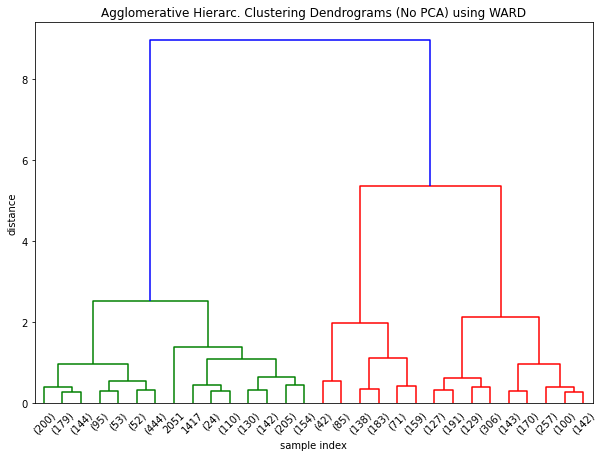

In [39]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 7))
plt.title("Agglomerative Hierarc. Clustering Dendrograms (No PCA) using WARD")
plt.xlabel('sample index')
plt.ylabel('distance')
dend2 = sch.dendrogram(sch.linkage(X_nopca, method='ward'), truncate_mode='lastp')

# DBSCAN

## DBSCAN (with PCA)

### Choosing Epsilon

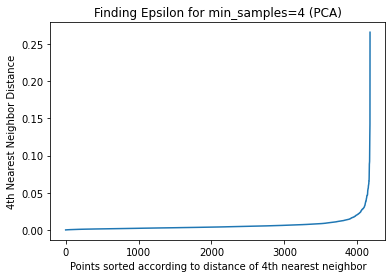

In [59]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title('Finding Epsilon for min_samples=4 (PCA)')
plt.xlabel('Points sorted according to distance of 4th nearest neighbor')
plt.ylabel('4th Nearest Neighbor Distance')
plt.plot(distances)

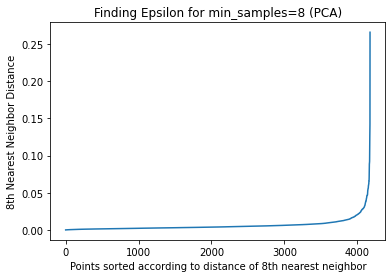

In [60]:
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title('Finding Epsilon for min_samples=8 (PCA)')
plt.xlabel('Points sorted according to distance of 8th nearest neighbor')
plt.ylabel('8th Nearest Neighbor Distance')
plt.plot(distances)

### Clustering DBSCAN - PCA

In [41]:
# import library DBSCAN
from sklearn.cluster import DBSCAN

In [45]:
# epsilon & min_samples yang akan digunakan untuk percobaan
eps_pca = [0.01, 0.02, 0.03]
min_samples_pca = [4, 8]
new_labels_dbscan_pca = [] #untuk menyimpan label cluster

# clustering dengan DBSCAN dan mencoba beberapa kombinasi epsilon dan minpts/min_samples

dbscan_pca_1 = DBSCAN(eps=0.01, min_samples=4)
dbscan_pca_1.fit(X_pca)
new_labels_dbscan_pca.append(dbscan_pca_1.labels_)

dbscan_pca_2 = DBSCAN(eps=0.01, min_samples=8)
dbscan_pca_2.fit(X_pca)
new_labels_dbscan_pca.append(dbscan_pca_2.labels_)

dbscan_pca_3 = DBSCAN(eps=0.02, min_samples=4)
dbscan_pca_3.fit(X_pca)
new_labels_dbscan_pca.append(dbscan_pca_3.labels_)

dbscan_pca_4 = DBSCAN(eps=0.02, min_samples=8)
dbscan_pca_4.fit(X_pca)
new_labels_dbscan_pca.append(dbscan_pca_4.labels_)

dbscan_pca_5 = DBSCAN(eps=0.03, min_samples=4)
dbscan_pca_5.fit(X_pca)
new_labels_dbscan_pca.append(dbscan_pca_5.labels_)

dbscan_pca_6 = DBSCAN(eps=0.03, min_samples=8)
dbscan_pca_6.fit(X_pca)
new_labels_dbscan_pca.append(dbscan_pca_6.labels_)


# simpan hasil clustering DBSCAN ke dataframe

result_dbscan1_pca = df_pca.copy()
result_dbscan1_pca['Cluster'] = new_labels_dbscan_pca[0]

result_dbscan2_pca = df_pca.copy()
result_dbscan2_pca['Cluster'] = new_labels_dbscan_pca[1]

result_dbscan3_pca = df_pca.copy()
result_dbscan3_pca['Cluster'] = new_labels_dbscan_pca[2]

result_dbscan4_pca = df_pca.copy()
result_dbscan4_pca['Cluster'] = new_labels_dbscan_pca[3]

result_dbscan5_pca = df_pca.copy()
result_dbscan5_pca['Cluster'] = new_labels_dbscan_pca[4]

result_dbscan6_pca = df_pca.copy()
result_dbscan6_pca['Cluster'] = new_labels_dbscan_pca[5]

In [46]:
# remove noise data from DBSCAN result
result_dbscan1_pca_clean = result_dbscan1_pca[result_dbscan1_pca['Cluster']>=0]
result_dbscan2_pca_clean = result_dbscan2_pca[result_dbscan2_pca['Cluster']>=0]
result_dbscan3_pca_clean = result_dbscan3_pca[result_dbscan3_pca['Cluster']>=0]
result_dbscan4_pca_clean = result_dbscan4_pca[result_dbscan4_pca['Cluster']>=0]
result_dbscan5_pca_clean = result_dbscan5_pca[result_dbscan5_pca['Cluster']>=0]
result_dbscan6_pca_clean = result_dbscan6_pca[result_dbscan6_pca['Cluster']>=0]

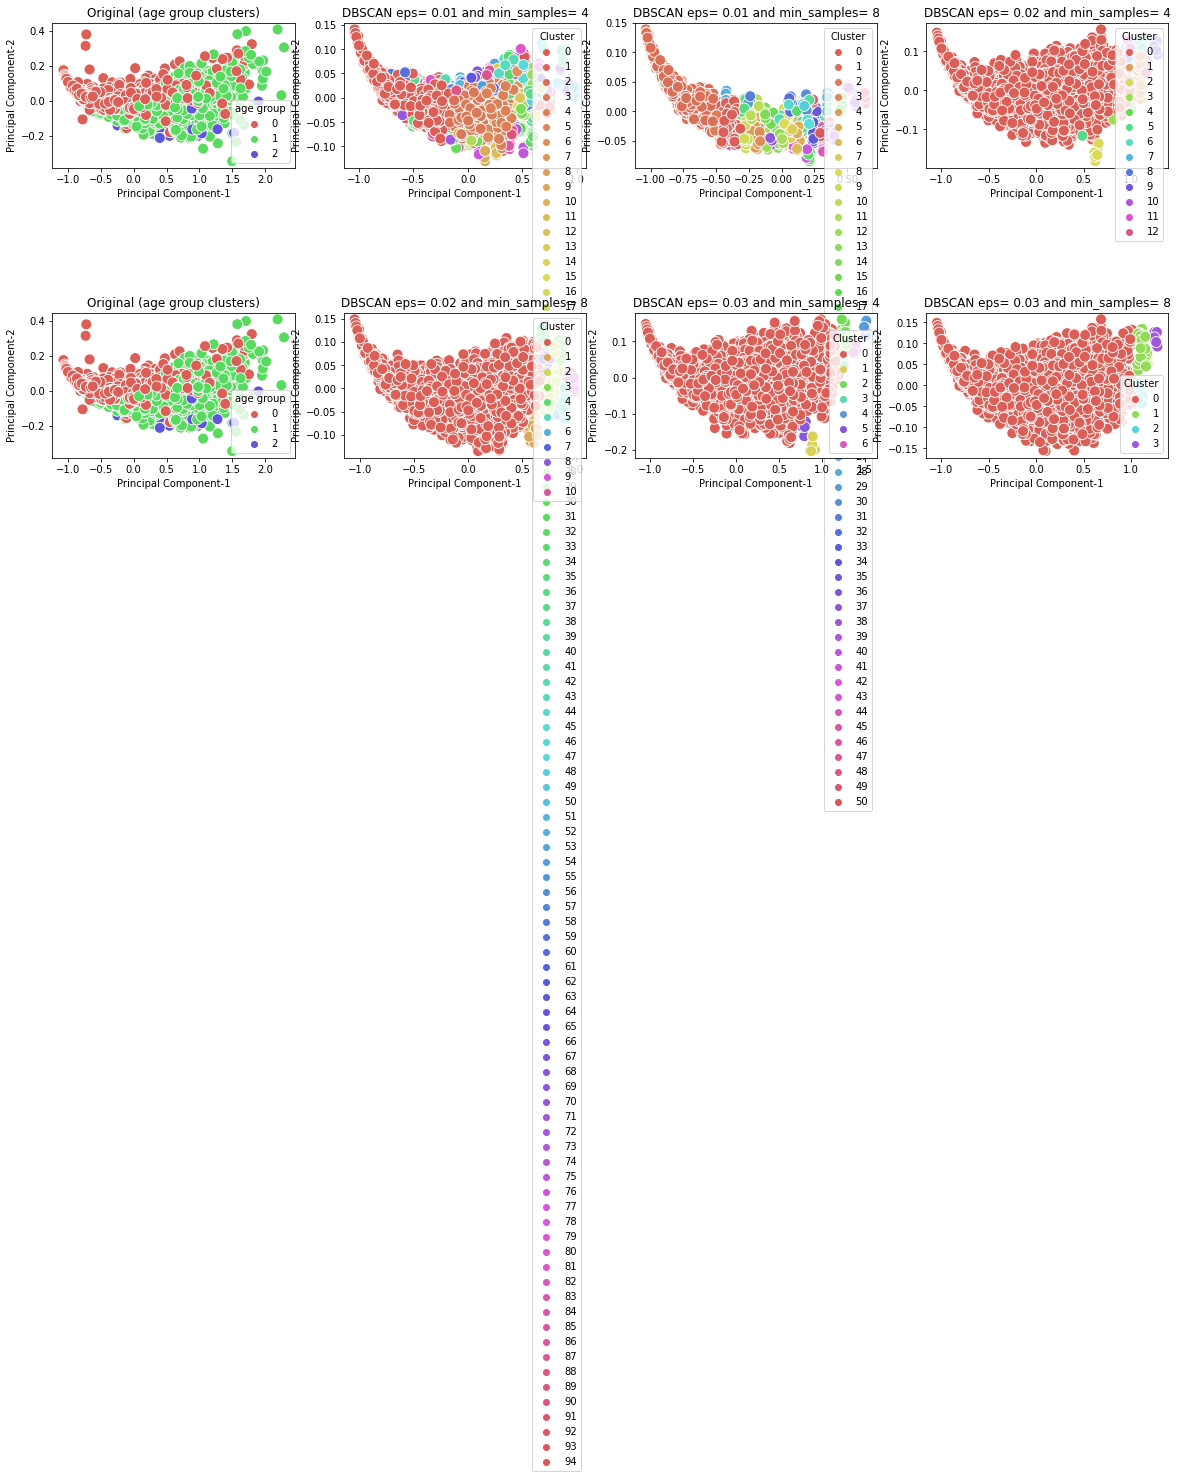

In [48]:
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(20, 8))
plt.subplots_adjust(hspace = 1)

# plotting original age group clustering

df_pca_agegroup = df_pca.copy()
df_pca_agegroup['age group'] = df_ab['age group']
sns.scatterplot(
    ax=axes[0,0],
    x=df_pca_agegroup.iloc[:,0], y=df_pca_agegroup.iloc[:,1],
    s=120,
    hue=df_pca_agegroup.iloc[:,2],
    palette= sns.color_palette('hls', len(df_pca_agegroup.iloc[:,2].unique())))
axes[0,0].set_title('Original (age group clusters)')

# plotting 1st DBSCAN eps= 0.01 and min_samples= 4 

sns.scatterplot(
    ax=axes[0,1],
    x=result_dbscan1_pca_clean.iloc[:,0], y=result_dbscan1_pca_clean.iloc[:,1], 
    hue= result_dbscan1_pca_clean.Cluster,
    s = 120,
    palette= sns.color_palette('hls', len(result_dbscan1_pca_clean.Cluster.unique())))
axes[0,1].set_title('DBSCAN eps= 0.01 and min_samples= 4')

# plotting 2nd DBSCAN eps= 0.01 and min_samples= 8

sns.scatterplot(
    ax=axes[0,2],
    x=result_dbscan2_pca_clean.iloc[:,0], y=result_dbscan2_pca_clean.iloc[:,1], 
    hue= result_dbscan2_pca_clean.Cluster,
    s = 120,
    palette= sns.color_palette('hls', len(result_dbscan2_pca_clean.Cluster.unique())))
axes[0,2].set_title('DBSCAN eps= 0.01 and min_samples= 8')

# plotting 3rd DBSCAN eps= 0.02 and min_samples= 4 

sns.scatterplot(
    ax=axes[0,3],
    x=result_dbscan3_pca_clean.iloc[:,0], y=result_dbscan3_pca_clean.iloc[:,1], 
    hue= result_dbscan3_pca_clean.Cluster,
    s = 120,
    palette= sns.color_palette('hls', len(result_dbscan3_pca_clean.Cluster.unique())))
axes[0,3].set_title('DBSCAN eps= 0.02 and min_samples= 4')

# plotting original age group clustering

df_pca_agegroup = df_pca.copy()
df_pca_agegroup['age group'] = df_ab['age group']
sns.scatterplot(
    ax=axes[1,0],
    x=df_pca_agegroup.iloc[:,0], y=df_pca_agegroup.iloc[:,1],
    s=120,
    hue=df_pca_agegroup.iloc[:,2],
    palette= sns.color_palette('hls', len(df_pca_agegroup.iloc[:,2].unique())))
axes[1,0].set_title('Original (age group clusters)')

# plotting 4th DBSCAN eps= 0.02 and min_samples= 8

sns.scatterplot(
    ax=axes[1,1],
    x=result_dbscan4_pca_clean.iloc[:,0], y=result_dbscan4_pca_clean.iloc[:,1], 
    hue= result_dbscan4_pca_clean.Cluster,
    s = 120,
    palette= sns.color_palette('hls', len(result_dbscan4_pca_clean.Cluster.unique())))
axes[1,1].set_title('DBSCAN eps= 0.02 and min_samples= 8')

# plotting 5th DBSCAN eps= 0.03 and min_samples= 4 

sns.scatterplot(
    ax=axes[1,2],
    x=result_dbscan5_pca_clean.iloc[:,0], y=result_dbscan5_pca_clean.iloc[:,1], 
    hue= result_dbscan5_pca_clean.Cluster,
    s = 120,
    palette= sns.color_palette('hls', len(result_dbscan5_pca_clean.Cluster.unique())))
axes[1,2].set_title('DBSCAN eps= 0.03 and min_samples= 4')

# plotting 5th DBSCAN eps= 0.03 and min_samples= 8

sns.scatterplot(
    ax=axes[1,3],
    x=result_dbscan6_pca_clean.iloc[:,0], y=result_dbscan6_pca_clean.iloc[:,1], 
    hue= result_dbscan6_pca_clean.Cluster,
    s = 120,
    palette= sns.color_palette('hls', len(result_dbscan6_pca_clean.Cluster.unique())))
axes[1,3].set_title('DBSCAN eps= 0.03 and min_samples= 8')


plt.show()

## DBSCAN (no PCA)

### Choosing Epsilon

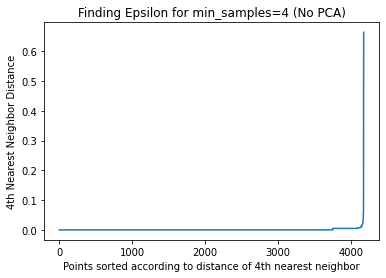

In [64]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X_nopca)
distances, indices = nbrs.kneighbors(X_nopca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title('Finding Epsilon for min_samples=4 (No PCA)')
plt.xlabel('Points sorted according to distance of 4th nearest neighbor')
plt.ylabel('4th Nearest Neighbor Distance')
plt.plot(distances)

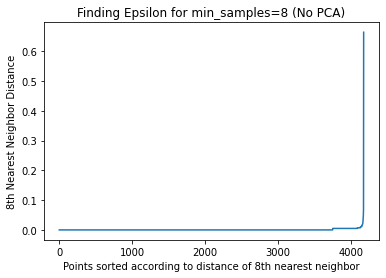

In [65]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X_nopca)
distances, indices = nbrs.kneighbors(X_nopca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title('Finding Epsilon for min_samples=8 (No PCA)')
plt.xlabel('Points sorted according to distance of 8th nearest neighbor')
plt.ylabel('8th Nearest Neighbor Distance')
plt.plot(distances)

### Clustering DBSCAN - NO PCA

In [66]:
# epsilon & min_samples yang akan digunakan untuk percobaan
eps_nopca = [0.01, 0.02, 0.03]
min_samples_nopca = [4, 8]
new_labels_dbscan_nopca = [] #untuk menyimpan label cluster

# clustering dengan DBSCAN dan mencoba beberapa kombinasi epsilon dan minpts/min_samples

dbscan_nopca_1 = DBSCAN(eps=0.01, min_samples=4)
dbscan_nopca_1.fit(X_nopca)
new_labels_dbscan_nopca.append(dbscan_nopca_1.labels_)

dbscan_nopca_2 = DBSCAN(eps=0.01, min_samples=8)
dbscan_nopca_2.fit(X_nopca)
new_labels_dbscan_nopca.append(dbscan_nopca_2.labels_)

dbscan_nopca_3 = DBSCAN(eps=0.02, min_samples=4)
dbscan_nopca_3.fit(X_nopca)
new_labels_dbscan_nopca.append(dbscan_nopca_3.labels_)

dbscan_nopca_4 = DBSCAN(eps=0.02, min_samples=8)
dbscan_nopca_4.fit(X_nopca)
new_labels_dbscan_nopca.append(dbscan_nopca_4.labels_)

dbscan_nopca_5 = DBSCAN(eps=0.03, min_samples=4)
dbscan_nopca_5.fit(X_nopca)
new_labels_dbscan_nopca.append(dbscan_nopca_5.labels_)

dbscan_nopca_6 = DBSCAN(eps=0.03, min_samples=8)
dbscan_nopca_6.fit(X_nopca)
new_labels_dbscan_nopca.append(dbscan_nopca_6.labels_)


# simpan hasil clustering DBSCAN ke dataframe

result_dbscan1_nopca = df_nopca.copy()
result_dbscan1_nopca['Cluster'] = new_labels_dbscan_nopca[0]

result_dbscan2_nopca = df_nopca.copy()
result_dbscan2_nopca['Cluster'] = new_labels_dbscan_nopca[1]

result_dbscan3_nopca = df_nopca.copy()
result_dbscan3_nopca['Cluster'] = new_labels_dbscan_nopca[2]

result_dbscan4_nopca = df_nopca.copy()
result_dbscan4_nopca['Cluster'] = new_labels_dbscan_nopca[3]

result_dbscan5_nopca = df_nopca.copy()
result_dbscan5_nopca['Cluster'] = new_labels_dbscan_nopca[4]

result_dbscan6_nopca = df_nopca.copy()
result_dbscan6_nopca['Cluster'] = new_labels_dbscan_nopca[5]

In [67]:
# remove noise data that is labeled as -1 from DBSCAN result
result_dbscan1_nopca_clean = result_dbscan1_nopca[result_dbscan1_nopca['Cluster']>=0]
result_dbscan2_nopca_clean = result_dbscan2_nopca[result_dbscan2_nopca['Cluster']>=0]
result_dbscan3_nopca_clean = result_dbscan3_nopca[result_dbscan3_nopca['Cluster']>=0]
result_dbscan4_nopca_clean = result_dbscan4_nopca[result_dbscan4_nopca['Cluster']>=0]
result_dbscan5_nopca_clean = result_dbscan5_nopca[result_dbscan5_nopca['Cluster']>=0]
result_dbscan6_nopca_clean = result_dbscan6_nopca[result_dbscan6_nopca['Cluster']>=0]

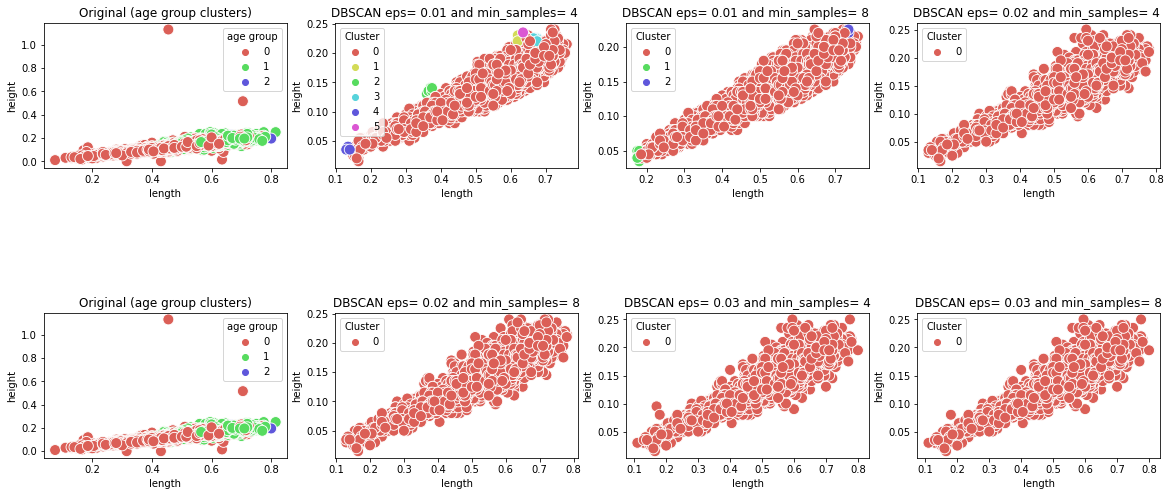

In [68]:
fig, axes = plt.subplots(nrows=2,ncols=4,figsize=(20, 8))
plt.subplots_adjust(hspace = 1)

# plotting original age group clustering

sns.scatterplot(
    ax=axes[0,0],
    x=df_nopca.iloc[:,0], y=df_nopca.iloc[:,1],
    s=120,
    hue=df_ab['age group'],
    palette= sns.color_palette('hls', len(df_ab['age group'].unique())))
axes[0,0].set_title('Original (age group clusters)')

# plotting 1st DBSCAN eps= 0.01 and min_samples= 4 

sns.scatterplot(
    ax=axes[0,1],
    x=result_dbscan1_nopca_clean.iloc[:,0], y=result_dbscan1_nopca_clean.iloc[:,1], 
    hue= result_dbscan1_nopca_clean.Cluster,
    s = 120,
    palette= sns.color_palette('hls', len(result_dbscan1_nopca_clean.Cluster.unique())))
axes[0,1].set_title('DBSCAN eps= 0.01 and min_samples= 4 ')

# plotting 2nd DBSCAN eps= 0.01 and min_samples= 8 

sns.scatterplot(
    ax=axes[0,2],
    x=result_dbscan2_nopca_clean.iloc[:,0], y=result_dbscan2_nopca_clean.iloc[:,1], 
    hue= result_dbscan2_nopca_clean.Cluster,
    s = 120,
    palette= sns.color_palette('hls', len(result_dbscan2_nopca_clean.Cluster.unique())))
axes[0,2].set_title('DBSCAN eps= 0.01 and min_samples= 8 ')

# plotting 3rd DBSCAN eps= 0.02 and min_samples= 4  

sns.scatterplot(
    ax=axes[0,3],
    x=result_dbscan3_nopca_clean.iloc[:,0], y=result_dbscan3_nopca_clean.iloc[:,1], 
    hue= result_dbscan3_nopca_clean.Cluster,
    s = 120,
    palette= sns.color_palette('hls', len(result_dbscan3_nopca_clean.Cluster.unique())))
axes[0,3].set_title('DBSCAN eps= 0.02 and min_samples= 4 ')

# plotting original age group clustering

sns.scatterplot(
    ax=axes[1,0],
    x=df_nopca.iloc[:,0], y=df_nopca.iloc[:,1],
    s=120,
    hue=df_ab['age group'],
    palette= sns.color_palette('hls', len(df_ab['age group'].unique())))
axes[1,0].set_title('Original (age group clusters)')

# plotting 4th DBSCAN eps= 0.02 and min_samples= 8 

sns.scatterplot(
    ax=axes[1,1],
    x=result_dbscan4_nopca_clean.iloc[:,0], y=result_dbscan4_nopca_clean.iloc[:,1], 
    hue= result_dbscan4_nopca_clean.Cluster,
    s = 120,
    palette= sns.color_palette('hls', len(result_dbscan4_nopca_clean.Cluster.unique())))
axes[1,1].set_title('DBSCAN eps= 0.02 and min_samples= 8')

# plotting 5th DBSCAN eps= 0.03 and min_samples= 4 

sns.scatterplot(
    ax=axes[1,2],
    x=result_dbscan5_nopca_clean.iloc[:,0], y=result_dbscan5_nopca_clean.iloc[:,1], 
    hue= result_dbscan5_nopca_clean.Cluster,
    s = 120,
    palette= sns.color_palette('hls', len(result_dbscan5_nopca_clean.Cluster.unique())))
axes[1,2].set_title('DBSCAN eps= 0.03 and min_samples= 4')

# plotting 5th DBSCAN eps= 0.03 and min_samples= 8 

sns.scatterplot(
    ax=axes[1,3],
    x=result_dbscan6_nopca_clean.iloc[:,0], y=result_dbscan6_nopca_clean.iloc[:,1], 
    hue= result_dbscan6_nopca_clean.Cluster,
    s = 120,
    palette= sns.color_palette('hls', len(result_dbscan6_nopca_clean.Cluster.unique())))
axes[1,3].set_title('DBSCAN eps= 0.03 and min_samples= 8')


plt.show()

# Calculating Cluster Validity

In [70]:
from sklearn.metrics import silhouette_score

In [73]:
sillhouette_score_list = []
cluster_list_pca = [kmean1_pca,kmean2_pca,ward_pca,max_pca,min_pca,avg_pca,dbscan_pca_1,dbscan_pca_2,dbscan_pca_3,dbscan_pca_4,dbscan_pca_5,dbscan_pca_6]
cluster_list_nopca = [kmean1_nopca,kmean2_nopca,ward_nopca,max_nopca,min_nopca,avg_nopca,dbscan_nopca_1,dbscan_nopca_2,dbscan_nopca_3,dbscan_nopca_4,dbscan_nopca_5,dbscan_nopca_6]
cluster_name_pca = ["K-Means k-means++ init. (PCA)", "K-Means random init. (PCA)", 
                    "Hierarc. Ward (PCA)", "Hierarc. Max (PCA)", "Hierarc. Min (PCA)", "Hierarc. Avg (PCA)", 
                    "DBSCAN eps=0.01, min_samples=4 (PCA)", "DBSCAN eps=0.01, min_samples=8 (PCA)", 
                    "DBSCAN eps=0.02, min_samples=4 (PCA)", "DBSCAN eps=0.02, min_samples=8 (PCA)",
                    "DBSCAN eps=0.03, min_samples=4 (PCA)", "DBSCAN eps=0.03, min_samples=8 (PCA)"]
cluster_name_nopca = ["K-Means k-means++ init. (No PCA)", "K-Means random init. (No PCA)", 
                    "Hierarc. Ward (No PCA)", "Hierarc. Max (No PCA)", "Hierarc. Min (No PCA)", "Hierarc. Avg (No PCA)", 
                    "DBSCAN eps=0.01, min_samples=4 (No PCA)", "DBSCAN eps=0.01, min_samples=8 (No PCA)", 
                    "DBSCAN eps=0.02, min_samples=4 (No PCA)", "DBSCAN eps=0.02, min_samples=8 (No PCA)",
                    "DBSCAN eps=0.03, min_samples=4 (No PCA)", "DBSCAN eps=0.03, min_samples=8 (No PCA)"]

for cluster in cluster_list_pca:
  sillhouette_index = silhouette_score(X_pca, cluster.labels_)
  sillhouette_score_list.append(sillhouette_index)

for cluster in cluster_list_nopca:
  sillhouette_index = silhouette_score(X_nopca, cluster.labels_)
  sillhouette_score_list.append(sillhouette_index)

In [74]:
cluster_name_pca.extend(cluster_name_nopca)
sillhouette_score_df = pd.DataFrame({'Cluster' : cluster_name_pca,'Sillhouette Score' : sillhouette_score_list})
sillhouette_score_df.sort_values('Sillhouette Score', ascending = False).head()

Cluster  Sillhouette Score
4                        Hierarc. Min (PCA)           0.663075
16                    Hierarc. Min (No PCA)           0.659736
22  DBSCAN eps=0.03, min_samples=4 (No PCA)           0.619172
23  DBSCAN eps=0.03, min_samples=8 (No PCA)           0.615008
17                    Hierarc. Avg (No PCA)           0.590993

In [75]:
sillhouette_score_df.sort_values('Sillhouette Score', ascending = False)

Cluster  Sillhouette Score
4                        Hierarc. Min (PCA)           0.663075
16                    Hierarc. Min (No PCA)           0.659736
22  DBSCAN eps=0.03, min_samples=4 (No PCA)           0.619172
23  DBSCAN eps=0.03, min_samples=8 (No PCA)           0.615008
17                    Hierarc. Avg (No PCA)           0.590993
15                    Hierarc. Max (No PCA)           0.566565
20  DBSCAN eps=0.02, min_samples=4 (No PCA)           0.563759
2                       Hierarc. Ward (PCA)           0.532893
1                K-Means random init. (PCA)           0.529852
0             K-Means k-means++ init. (PCA)           0.528942
14                   Hierarc. Ward (No PCA)           0.518170
13            K-Means random init. (No PCA)           0.517685
12         K-Means k-means++ init. (No PCA)           0.517685
5                        Hierarc. Avg (PCA)           0.516401
21  DBSCAN eps=0.02, min_samples=8 (No PCA)           0.506355
3                        Hierarc. Max (PCA)           0.421829
11     DBSCAN eps=0.03, min_samples=8 (PCA)           0.340143
10     DBSCAN eps=0.03, min_samples=4 (PCA)           0.159263
19  DBSCAN eps=0.01, min_samples=8 (No PCA)           0.117652
9      DBSCAN eps=0.02, min_samples=8 (PCA)           0.090284
8      DBSCAN eps=0.02, min_samples=4 (PCA)          -0.033597
7      DBSCAN eps=0.01, min_samples=8 (PCA)          -0.308933
18  DBSCAN eps=0.01, min_samples=4 (No PCA)          -0.360173
6      DBSCAN eps=0.01, min_samples=4 (PCA)          -0.518563